# Deep Learning 2023- 2024
Linda Marrakchi-Kacem


# Churn modeling


In [ ]:
!pip install scikeras

In [ ]:

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
from google.colab import files

In [ ]:
data = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling (1).csv


## Part 1 - Data Preprocessing

### Importing the dataset

In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


1) Identify X and y variables isolate them from each other

In [ ]:
# Identification de X (caractéristiques) et y (variable cible)
X = dataset.iloc[:, :-1]  # Sélection de toutes les colonnes sauf la dernière pour X
y = dataset['Exited']     # Sélection de la dernière colonne pour y (colonne "Exited")

# Affichage des caractéristiques (X) et de la variable cible (y) pour assurer leur exactitude
columns_to_drop = ["RowNumber", "CustomerId", "Surname"]
X = X.drop(columns=columns_to_drop)
X.head()



,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


### Encoding categorical data

2) Label Encode the "Gender" column

In [ ]:
from sklearn.preprocessing import LabelEncoder

gender_label_encoder = LabelEncoder()
X['Gender'] = gender_label_encoder.fit_transform(X['Gender'])

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10


3) Perform a One Hot Encoding the "Geography" column

In [ ]:
# Assuming 'Geography' is the categorical column in your dataset
X = pd.get_dummies(X, columns=['Geography'])

X.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


### Splitting the dataset into the Training set and Test *set*

4) Split the dataset into 80% train and 20% test

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into 80% training and 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and test sets to confirm the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (8000, 12)
X_test shape: (2000, 12)
y_train shape: (8000,)
y_test shape: (2000,)


### Feature Scaling

5) Use an appropriate feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test set
X_test_scaled = scaler.transform(X_test)


7) Train a neural network to solve the problem and compare the results

# Homework

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier

In [ ]:
X_train_p1, X_val, y_train_p1, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

In [ ]:
sequential = Sequential()
sequential.add(Dense(units=6, activation='relu', input_shape=(X_train_scaled.shape[1],)))
sequential.add(Dense(units=6, activation='relu'))
sequential.add(Dense(units=1, activation='tanh'))

sequential.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

history = sequential.fit(X_train_p1, y_train_p1, epochs=10, batch_size=100, validation_data=(X_val, y_val))

Epoch 1/10
64/64 [==============================] - 1s 6ms/step - loss: 0.6140 - accuracy: 0.7942 - val_loss: 0.4337 - val_accuracy: 0.7956
Epoch 2/10
64/64 [==============================] - 0s 8ms/step - loss: 0.3194 - accuracy: 0.7942 - val_loss: 0.2517 - val_accuracy: 0.7956
Epoch 3/10
64/64 [==============================] - 0s 7ms/step - loss: 0.2117 - accuracy: 0.7942 - val_loss: 0.1937 - val_accuracy: 0.7956
Epoch 4/10
64/64 [==============================] - 0s 7ms/step - loss: 0.1792 - accuracy: 0.7942 - val_loss: 0.1738 - val_accuracy: 0.7956
Epoch 5/10
64/64 [==============================] - 0s 6ms/step - loss: 0.1670 - accuracy: 0.7944 - val_loss: 0.1638 - val_accuracy: 0.7956
Epoch 6/10
64/64 [==============================] - 0s 7ms/step - loss: 0.1608 - accuracy: 0.7952 - val_loss: 0.1584 - val_accuracy: 0.7956
Epoch 7/10
64/64 [==============================] - 0s 6ms/step - loss: 0.1573 - accuracy: 0.7962 - val_loss: 0.1550 - val_accuracy: 0.7969
Epoch 8/10
64/64 [==

In [ ]:
acc=history.history['accuracy']
print('Model 1 accuracy',np.mean(acc))

Model 1 accuracy 0.7961718797683716


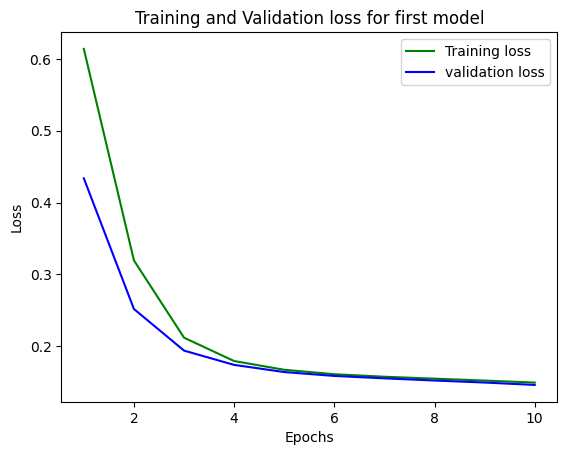

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss for first model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
sequential_1 = Sequential()
sequential_1.add(Dense(units=10, activation='relu', input_shape=(X_train_scaled.shape[1],)))
sequential_1.add(Dense(units=10, activation='relu'))
sequential_1.add(Dense(units=1, activation='tanh'))


sequential_1.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

history1 = sequential_1.fit(X_train_scaled, y_train, epochs=20, batch_size=50, validation_data=(X_val, y_val))

Epoch 1/20
160/160 [==============================] - 1s 4ms/step - loss: 0.1907 - accuracy: 0.7442 - val_loss: 0.1493 - val_accuracy: 0.8037
Epoch 2/20
160/160 [==============================] - 0s 3ms/step - loss: 0.1435 - accuracy: 0.8039 - val_loss: 0.1317 - val_accuracy: 0.8194
Epoch 3/20
160/160 [==============================] - 0s 3ms/step - loss: 0.1325 - accuracy: 0.8180 - val_loss: 0.1232 - val_accuracy: 0.8300
Epoch 4/20
160/160 [==============================] - 0s 3ms/step - loss: 0.1264 - accuracy: 0.8271 - val_loss: 0.1178 - val_accuracy: 0.8381
Epoch 5/20
160/160 [==============================] - 0s 3ms/step - loss: 0.1224 - accuracy: 0.8344 - val_loss: 0.1146 - val_accuracy: 0.8444
Epoch 6/20
160/160 [==============================] - 0s 2ms/step - loss: 0.1199 - accuracy: 0.8404 - val_loss: 0.1131 - val_accuracy: 0.8500
Epoch 7/20
160/160 [==============================] - 1s 3ms/step - loss: 0.1179 - accuracy: 0.8469 - val_loss: 0.1124 - val_accuracy: 0.8475
Epoch 

In [ ]:
acc=history1.history['accuracy']
print('Model 2 accuracy',np.mean(acc))

Model 2 accuracy 0.8400062590837478


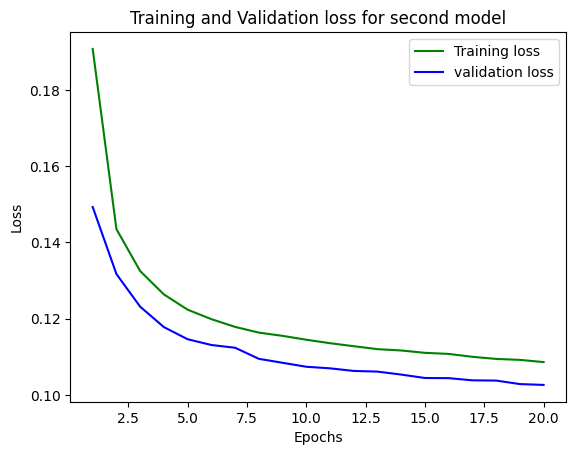

In [ ]:
loss_train1 = history1.history['loss']
loss_val1 = history1.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, loss_train1, 'g', label='Training loss')
plt.plot(epochs, loss_val1, 'b', label='validation loss')
plt.title('Training and Validation loss for second model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier

In [ ]:
# define the grid search parameters
optimizer_ = ['SGD', 'Adam']
activation_func = ['softmax','relu','tanh', 'sigmoid']
neurons = [4, 8]
batch_size_ = [5, 10]
epochs_ = [5, 10]
loss_func = ['mean_squared_error','binary_crossentropy']
#learn_rate = [0.001, 0.01, 0.1]
#momentum = [0.4, 0.6, 0.8, 0.9]
param_grid = dict(optimizer=optimizer_,model__neurons=neurons,model__loss_func=loss_func,model__activation_func=activation_func,batch_size=batch_size_, epochs=epochs_)
                  #,optimizer__learning_rate=learn_rate,#optimizer__momentum=momentum)

In [ ]:
def create_model(neurons,loss_func,activation_func):
    # create model
    model = Sequential()
    model.add(Dense(units=neurons, activation=activation_func, input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(units=neurons, activation=activation_func))
    model.add(Dense(units=1, activation=activation_func))  # Changed activation to 'sigmoid' for binary classification
    # Compile model
    model.compile(loss=loss_func, metrics=['accuracy'])
    return model

In [ ]:
model = KerasClassifier(model=create_model) #model = KerasClassifier(model=create_model, epochs=100, batch_size=10, verbose=0)

In [ ]:
#for cv in [4, 6, 8 ,10]:
#print("-------------------- Results for CV=",3)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_scaled, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.1558 - accuracy: 0.7968
Epoch 2/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.1381 - accuracy: 0.8149
Epoch 3/10
1600/1600 [==============================] - 4s 2ms/step - loss: 0.1320 - accuracy: 0.8257
Epoch 4/10
1600/1600 [==============================] - 4s 2ms/step - loss: 0.1249 - accuracy: 0.8346
Epoch 5/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.1177 - accuracy: 0.8468
Epoch 6/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.1129 - accuracy: 0.8521
Epoch 7/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.1102 - accuracy: 0.8556
Epoch 8/10
1600/1600 [==============================] - 4s 3ms/step - loss: 0.1085 - accuracy: 0.8595
Epoch 9/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.1076 - accuracy: 0.8618
Epoch 10/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.107